In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# STEP 1: Load the dataset
# ---------------------------------------------------------
file_path = "merged_R&R.xlsx"   # <-- change if needed
df = pd.read_excel(file_path)

# Clean column names (remove trailing spaces)
df.columns = [c.strip() for c in df.columns]

print("Dataset Loaded Successfully")
print(df.head())


Dataset Loaded Successfully
   S.no       Employee Name  Team name    Month        Award Title  \
0   1.0  Charlotte Harrison        NaN  January         Star award   
1   2.0         Gabriel Lee        NaN  January    Spotlight Award   
2   3.0        Cole Gabriel   TA - SST  January         Spot Award   
3   4.0         Owen Powell   TA - SST  January         Spot Award   
4   5.0           Jim Baker  Greenmath  January  Team Impact Award   

    Nominated By Coupon Amount Distribution Nominated In    year Type  \
0     Chang Will       Rs.3000          Yes    All-Hands  2025.0  NaN   
1      Leah Long       Rs.3000          Yes    All-Hands  2025.0  NaN   
2  Davis Kaitlyn       Rs.1000          Yes    All-Hands  2025.0  NaN   
3  Davis Kaitlyn       Rs.1000          Yes    All-Hands  2025.0  NaN   
4    Evelyn Hall       Rs.1000          Yes    All-Hands  2025.0  NaN   

  New_Award_title  
0      Spot Award  
1      Spot Award  
2      Team Award  
3      Team Award  
4      Team 

In [3]:
# ---------------------------------------------------------
# STEP 2: Count awards per employee
# ---------------------------------------------------------
award_counts = df.groupby("Employee Name")["Award Title"].count().reset_index()
award_counts = award_counts.rename(columns={"Award Title": "Total Awards"})
award_counts = award_counts.sort_values(by="Total Awards", ascending=False)

print("Awards per Employee:")
print(award_counts.head(10))


Awards per Employee:
      Employee Name  Total Awards
142   Vera Gonzalez            16
106     Maya Gordon            13
4    Aidan Marshall            11
41      Ellie Grant            11
7      Aiden Morgan            10
5       Aidan Scott            10
74     Isaac Murphy            10
99    Mack Robinson            10
90    Leo Henderson             9
23     Campbell Mik             9


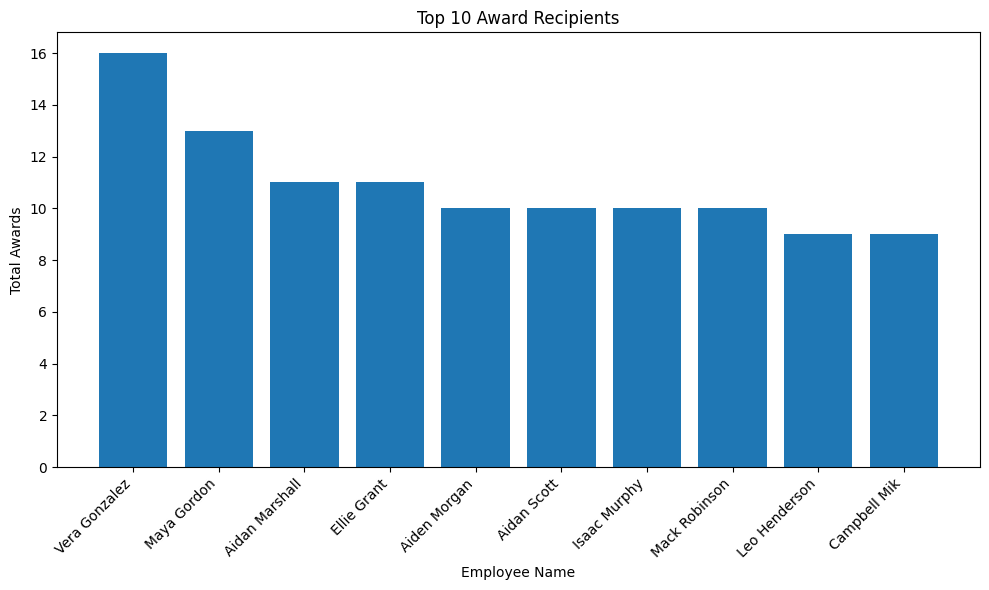

In [4]:
# ---------------------------------------------------------
# STEP 3: Bar Chart - Top 10 Award Recipients
# ---------------------------------------------------------
top_n = 10
top_awardees = award_counts.head(top_n)

plt.figure(figsize=(10,6))
plt.bar(top_awardees["Employee Name"], top_awardees["Total Awards"])
plt.title(f"Top {top_n} Award Recipients")
plt.xlabel("Employee Name")
plt.ylabel("Total Awards")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [5]:
# ---------------------------------------------------------
# STEP 4: Awards by Team
# ---------------------------------------------------------
team_counts = df.groupby("Team name")["Award Title"].count().reset_index()
team_counts = team_counts.rename(columns={"Award Title": "Total Awards"})
team_counts = team_counts.sort_values(by="Total Awards", ascending=False)

print("Awards per Team:")
print(team_counts)


Awards per Team:
                        Team name  Total Awards
6                   Edgecore Team            26
12                      Greenmath            24
1   Appreciation for Boston Event            22
19                  Mentor Marvel            17
24            Pre Placement Talks            14
8                    For Branding            14
37                             o9            14
3                            Bose            12
0                               -            11
36                         Verite            10
38                        o9 - DE            10
39                   o9 - Deckers             9
27                       TA - SST             8
30                         Takeda             8
23               People Resources             8
7                        Fin / HR             6
9                         GE Team             6
21                        O9 - DE             6
31             Talent Story Board             6
26                     

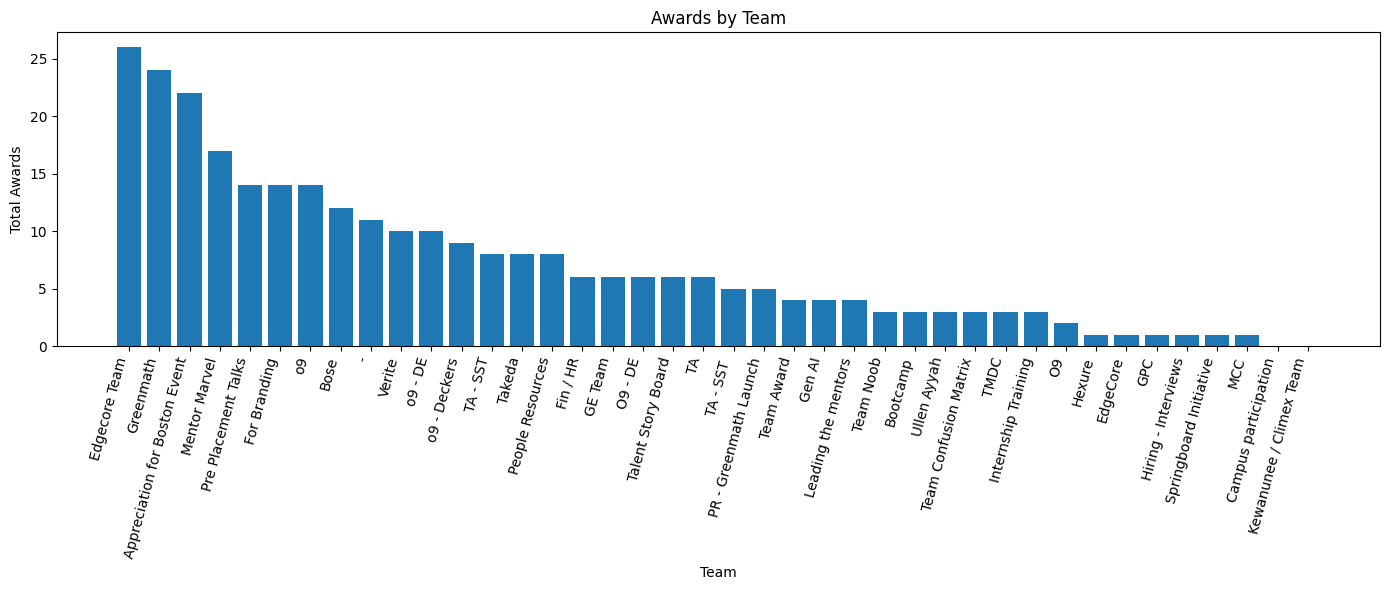

In [6]:
# ---------------------------------------------------------
# STEP 5: Bar Chart - Awards by Team
# ---------------------------------------------------------
plt.figure(figsize=(14,6))
plt.bar(team_counts["Team name"].astype(str), team_counts["Total Awards"])
plt.title("Awards by Team")
plt.xlabel("Team")
plt.ylabel("Total Awards")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()


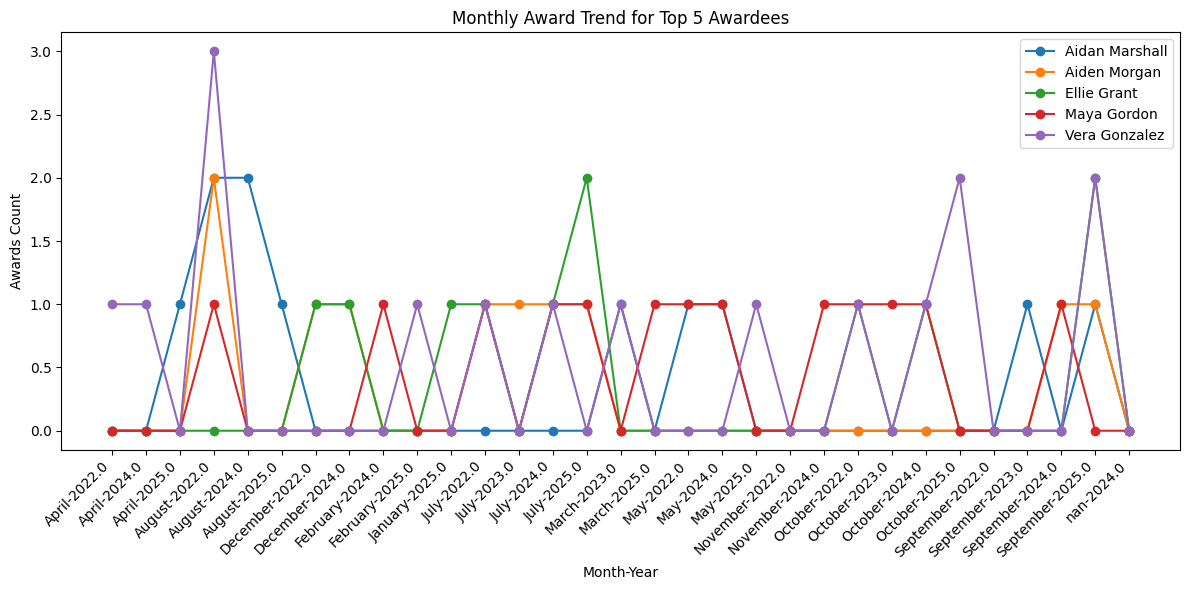

In [7]:
# ---------------------------------------------------------
# STEP 6: Monthly Award Trend for Top 5 Employees
# ---------------------------------------------------------
df_copy = df.copy()
df_copy["Month_Year"] = df_copy["Month"].astype(str) + "-" + df_copy["year"].astype(str)

trend = df_copy.groupby(["Month_Year", "Employee Name"])["Award Title"].count().reset_index()
trend = trend.rename(columns={"Award Title": "Count"})

top5 = award_counts.head(5)["Employee Name"].tolist()
trend_top = trend[trend["Employee Name"].isin(top5)]

trend_pivot = trend_top.pivot(index="Month_Year", columns="Employee Name", values="Count").fillna(0)

plt.figure(figsize=(12,6))
for col in trend_pivot.columns:
    plt.plot(trend_pivot.index, trend_pivot[col], marker='o', label=col)

plt.title("Monthly Award Trend for Top 5 Awardees")
plt.xlabel("Month-Year")
plt.ylabel("Awards Count")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
# ---------------------------------------------------------
# STEP 7: Employees with 0 or 1 Award (Gaps)
# ---------------------------------------------------------
low_awards = award_counts[award_counts["Total Awards"] <= 1]

print("Employees with 0 or 1 Award:")
print(low_awards)


Employees with 0 or 1 Award:
          Employee Name  Total Awards
1            Adam Lynch             1
12          Aria Wilson             1
21         Calvin Baker             1
20       Caden Campbell             1
8          Alana Morris             1
42        Emery Cameron             1
36           Eden Allen             1
29         Cole Gabriel             1
22        Cameron Allen             1
52      Felicity Warren             1
117         Quinn Perry             1
111            Mir Jake             1
84          Layla Allen             1
78         Jackson Moss             1
67        Harper Wilson             1
65       Harper Johnson             1
79         James Miller             1
81        June Martinez             1
59        Gianna Ortega             1
56           Fiona Reed             1
55     Fiona Harrington             1
62         Harper Brown             1
44           Emery Moss             1
47          Ethan Clark             1
48          Ethan Smi

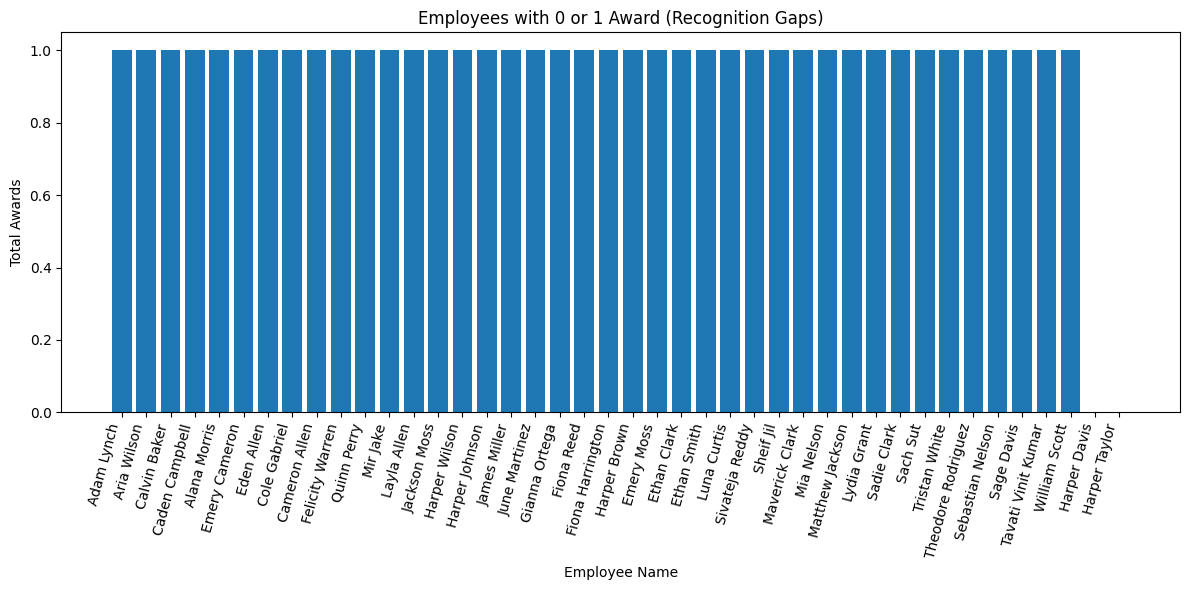

In [9]:
# ---------------------------------------------------------
# STEP 8: Bar Chart - Low Recognition
# ---------------------------------------------------------
plt.figure(figsize=(12,6))
plt.bar(low_awards["Employee Name"], low_awards["Total Awards"])
plt.title("Employees with 0 or 1 Award (Recognition Gaps)")
plt.xlabel("Employee Name")
plt.ylabel("Total Awards")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()


In [10]:
# ---------------------------------------------------------
# STEP 9: Year-wise Award Counts
# ---------------------------------------------------------
year_counts = df.groupby("year")["Award Title"].count().reset_index()
year_counts = year_counts.rename(columns={"Award Title": "Total Awards"})
year_counts = year_counts.sort_values(by="year")

print("Year-wise Award Distribution:")
print(year_counts)


Year-wise Award Distribution:
     year  Total Awards
0  2022.0           158
1  2023.0            38
2  2024.0           148
3  2025.0           214


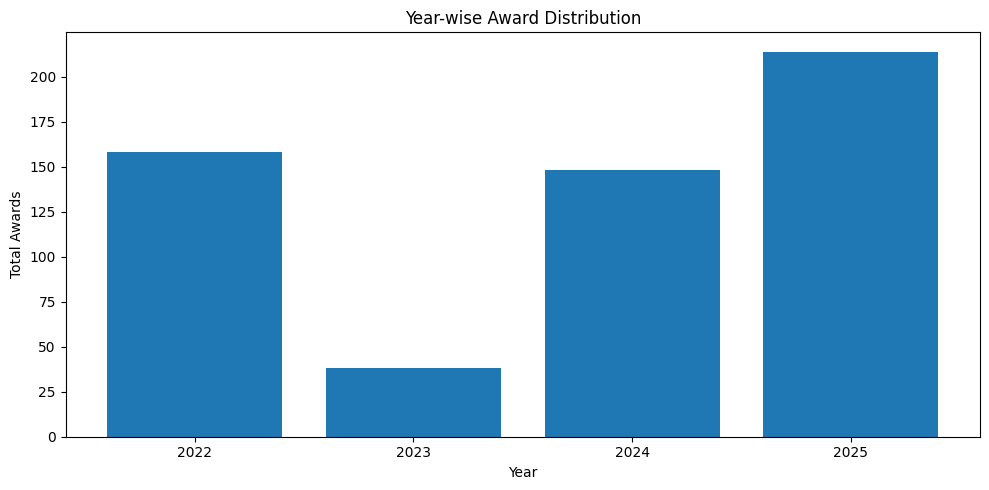

In [11]:
plt.figure(figsize=(10,5))
plt.bar(year_counts["year"], year_counts["Total Awards"])
plt.title("Year-wise Award Distribution")
plt.xlabel("Year")
plt.ylabel("Total Awards")
plt.xticks(year_counts["year"])
plt.tight_layout()
plt.show()


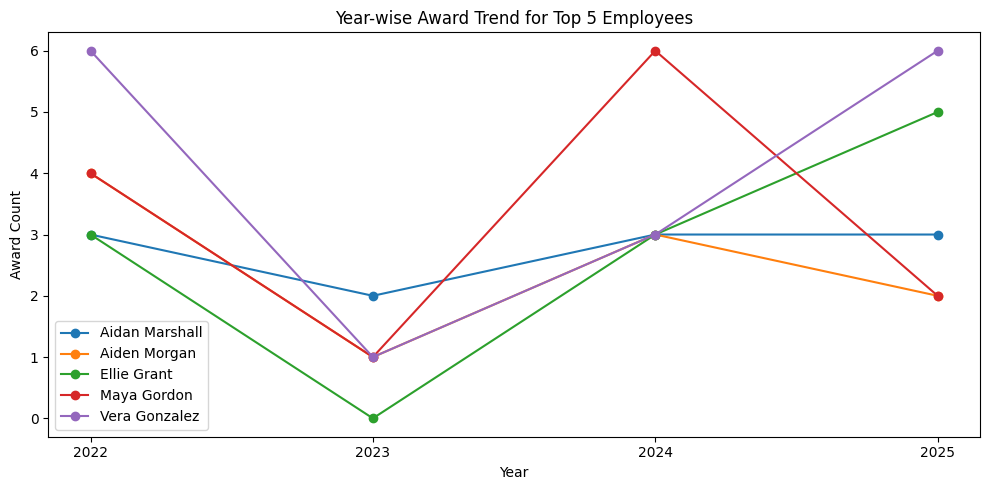

In [12]:
top5 = award_counts.head(5)["Employee Name"].tolist()

year_employee = df[df["Employee Name"].isin(top5)] \
    .groupby(["year", "Employee Name"])["Award Title"] \
    .count().reset_index().rename(columns={"Award Title": "Count"})

pivot_year = year_employee.pivot(index="year", columns="Employee Name", values="Count").fillna(0)

plt.figure(figsize=(10,5))
for col in pivot_year.columns:
    plt.plot(pivot_year.index, pivot_year[col], marker='o', label=col)

plt.title("Year-wise Award Trend for Top 5 Employees")
plt.xlabel("Year")
plt.ylabel("Award Count")
plt.xticks(pivot_year.index)
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
# ---------------------------------------------------------
# STEP 12: List all Award Titles per Employee
# ---------------------------------------------------------

employee_award_details = df.groupby("Employee Name")["Award Title"].apply(list).reset_index()
employee_award_details = employee_award_details.rename(columns={"Award Title": "Award Titles Received"})

print("Award Titles for Each Employee:")
print(employee_award_details)


Award Titles for Each Employee:
        Employee Name                              Award Titles Received
0        Adam Douglas                       [Rising Stars, Rising Stars]
1          Adam Lynch                                       [Star Award]
2          Adams Cole                        [Spot Award, Awesome Award]
3    Addison Robinson                        [Spot Award, Awesome Award]
4      Aidan Marshall  [Value Champion, Spot Award, Team Award, Team ...
..                ...                                                ...
145       Vivian Long  [Team Awesome Award, Above & Beyond, Team Awes...
146   Vivian Williams      [Awesome Award, Awesome Award, Awesome Award]
147   Walker Gonzalez   [nan, Team Awesome Award, Campus Execution, nan]
148     William Scott                           [Team Impact Award, nan]
149        Zoey Grant  [Awesome Award, Awesome Award, Team Award, Spo...

[150 rows x 2 columns]


In [14]:
top5 = award_counts.head(5)["Employee Name"].tolist()

top5_awards = df[df["Employee Name"].isin(top5)] \
    .groupby("Employee Name")["Award Title"].apply(list).reset_index()

print("Award Titles for Top 5 Award Recipients:")
print(top5_awards)


Award Titles for Top 5 Award Recipients:
    Employee Name                                        Award Title
0  Aidan Marshall  [Value Champion, Spot Award, Team Award, Team ...
1    Aiden Morgan  [Spot Award, Awesome Award, Appreciation for B...
2     Ellie Grant  [Team Awesome Award, Awesome Award, Spot Award...
3     Maya Gordon  [Super Star Award, Awesome Award, Team Awesome...
4   Vera Gonzalez  [Team Impact Award, Star Award, Awesome Award,...


In [15]:
employee_award_expanded = df[["Employee Name", "Award Title", "Month", "year", "Nominated By"]]
employee_award_expanded = employee_award_expanded.sort_values(["Employee Name", "year", "Month"])

print("Detailed Award Breakdown:")
print(employee_award_expanded.head(20))


Detailed Award Breakdown:
        Employee Name               Award Title      Month    year  \
628      Adam Douglas              Rising Stars  September  2022.0   
374      Adam Douglas              Rising Stars  September  2024.0   
72         Adam Lynch                Star Award        May  2025.0   
135        Adams Cole                Spot Award     August  2025.0   
141        Adams Cole             Awesome Award     August  2025.0   
61   Addison Robinson                Spot Award      April  2025.0   
119  Addison Robinson             Awesome Award       June  2025.0   
560    Aidan Marshall                Star Award     August  2022.0   
564    Aidan Marshall          Campus Execution     August  2022.0   
509    Aidan Marshall                Team Award        May  2022.0   
438    Aidan Marshall         Go the Extra Mile      March  2023.0   
459    Aidan Marshall  Chief Happiness Director  September  2023.0   
306    Aidan Marshall                Star Award     August  2024

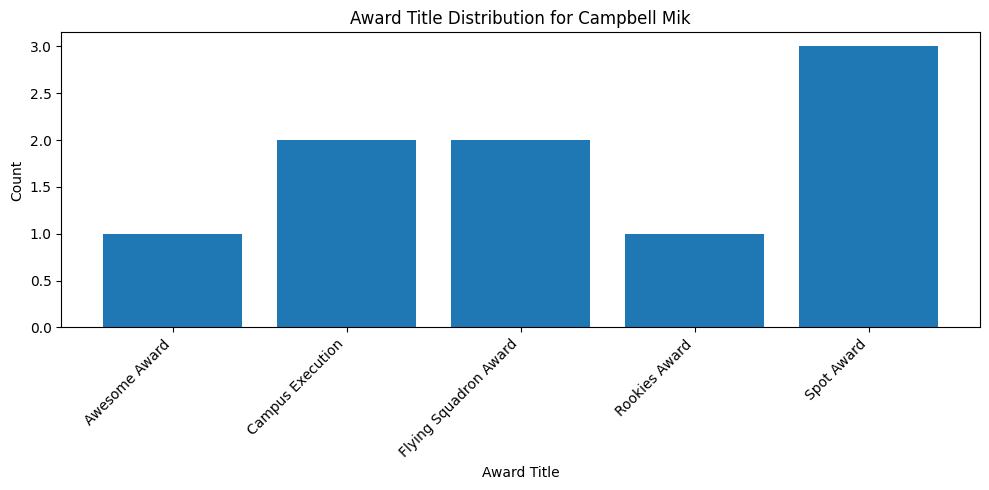

: 

In [ ]:
# ---------------------------------------------------------
# Bar Chart: Count of Award Titles for a Selected Employee
# ---------------------------------------------------------

employee_name = "Campbell Mik"   # <- change to any employee name

employee_data = df[df["Employee Name"] == employee_name] \
    .groupby("Award Title")["Award Title"].count().rename("Count").reset_index()

plt.figure(figsize=(10,5))
plt.bar(employee_data["Award Title"], employee_data["Count"])
plt.title(f"Award Title Distribution for {employee_name}")
plt.xlabel("Award Title")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


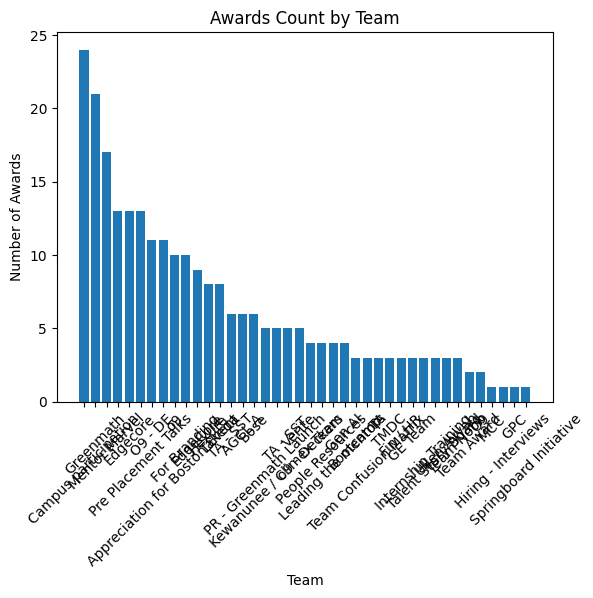

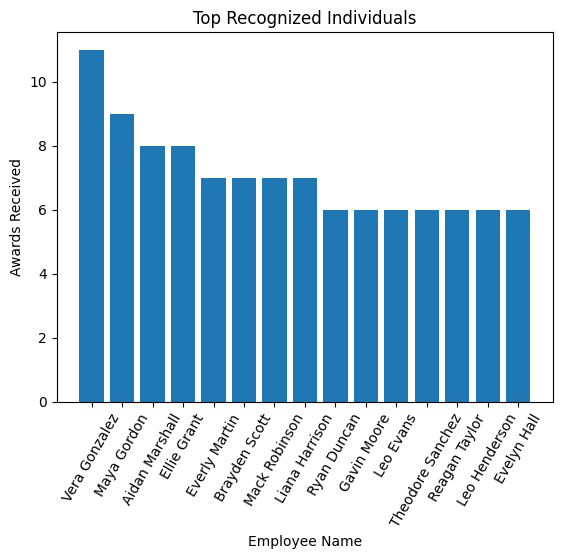

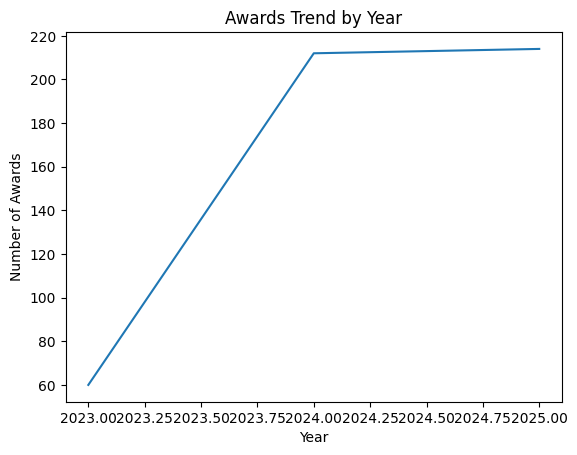

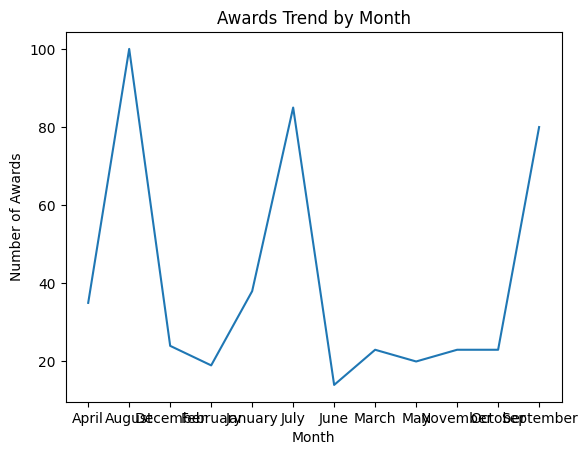

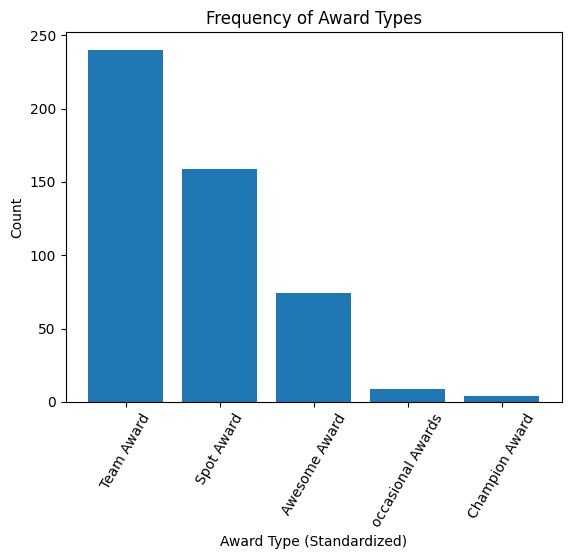

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Load your file (change filename here)
# -----------------------------
# Load
sheet_key = "1ocBuWqHA4e9m2-qyEMvfWqed6SUOEHlj_c2GenObysc"
url = f"https://docs.google.com/spreadsheets/d/{sheet_key}/export?format=csv"
df = pd.read_csv(url)

# Ensure consistent column names
df.columns = df.columns.str.strip()

# -----------------------------
# 1. Top Teams by Awards
# -----------------------------
team_awards = df.groupby("Team name")["Employee Name"].count().reset_index(name="Award Count")
team_awards = team_awards.sort_values("Award Count", ascending=False)

plt.figure()
plt.bar(team_awards["Team name"], team_awards["Award Count"])
plt.xlabel("Team")
plt.ylabel("Number of Awards")
plt.title("Awards Count by Team")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 2. Top Individuals by Awards
# -----------------------------
employee_awards = df.groupby("Employee Name")["Award Title"].count().reset_index(name="Awards Received")
employee_awards = employee_awards.sort_values("Awards Received", ascending=False).head(15)

plt.figure()
plt.bar(employee_awards["Employee Name"], employee_awards["Awards Received"])
plt.xlabel("Employee Name")
plt.ylabel("Awards Received")
plt.title("Top Recognized Individuals")
plt.xticks(rotation=60)
plt.show()

# -----------------------------
# 3. Awards Trend by Year
# -----------------------------
year_trend = df.groupby("year")["Employee Name"].count().reset_index(name="Total Awards")

plt.figure()
plt.plot(year_trend["year"], year_trend["Total Awards"])
plt.xlabel("Year")
plt.ylabel("Number of Awards")
plt.title("Awards Trend by Year")
plt.show()

# -----------------------------
# 4. Awards Trend by Month
# -----------------------------
month_trend = df.groupby("Month")["Employee Name"].count().reset_index(name="Awards Count")
month_trend = month_trend.sort_values("Month")

plt.figure()
plt.plot(month_trend["Month"], month_trend["Awards Count"])
plt.xlabel("Month")
plt.ylabel("Number of Awards")
plt.title("Awards Trend by Month")
plt.show()

# -----------------------------
# 5. Award Type Frequency
# -----------------------------
award_type = df.groupby("New_Award_title")["Employee Name"].count().reset_index(name="Count")
award_type = award_type.sort_values("Count", ascending=False)

plt.figure()
plt.bar(award_type["New_Award_title"], award_type["Count"])
plt.xlabel("Award Type (Standardized)")
plt.ylabel("Count")
plt.title("Frequency of Award Types")
plt.xticks(rotation=60)
plt.show()


"80% of awards are concentrated among 20% of employees" - Testing whether recognition follows a Pareto distribution, indicating potential favoritism or genuine top performers.

In [12]:
import pandas as pd
import numpy as np

# Load
sheet_key = "1ocBuWqHA4e9m2-qyEMvfWqed6SUOEHlj_c2GenObysc"
url = f"https://docs.google.com/spreadsheets/d/{sheet_key}/export?format=csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()

# Count awards per employee
employee_awards = df.groupby("Employee Name")["Award Title"].count().reset_index(name="Awards")
employee_awards = employee_awards.sort_values("Awards", ascending=False)

# Calculate cumulative distribution
employee_awards["Cumulative Awards %"] = employee_awards["Awards"].cumsum() / employee_awards["Awards"].sum() * 100
employee_awards["Cumulative Employee %"] = np.arange(1, len(employee_awards)+1) / len(employee_awards) * 100

print("\nTop Employees by Awards:\n", employee_awards.head(10))

# Identify percentage of employees who contribute to 80% of awards
pareto_cutoff = employee_awards[employee_awards["Cumulative Awards %"] <= 80]
percent_employees_for_80 = len(pareto_cutoff) / len(employee_awards) * 100

print(f"\n🔍 PARETO RESULT:")
print(f"{percent_employees_for_80:.2f}% of employees received 80% of the awards.")

if percent_employees_for_80 <= 25:
    print("➡️ Awards follow a strong Pareto pattern (concentrated among few employees).")
else:
    print("➡️ Awards are more evenly distributed (weaker Pareto effect).")



Top Employees by Awards:
       Employee Name  Awards  Cumulative Awards %  Cumulative Employee %
142   Vera Gonzalez      11             2.669903               0.666667
106     Maya Gordon       9             4.854369               1.333333
4    Aidan Marshall       8             6.796117               2.000000
41      Ellie Grant       8             8.737864               2.666667
50    Everly Martin       7            10.436893               3.333333
17    Brayden Scott       7            12.135922               4.000000
99    Mack Robinson       7            13.834951               4.666667
93   Liana Harrison       7            15.533981               5.333333
122     Ryan Duncan       6            16.990291               6.000000
58      Gavin Moore       6            18.446602               6.666667

🔍 PARETO RESULT:
52.67% of employees received 80% of the awards.
➡️ Awards are more evenly distributed (weaker Pareto effect).


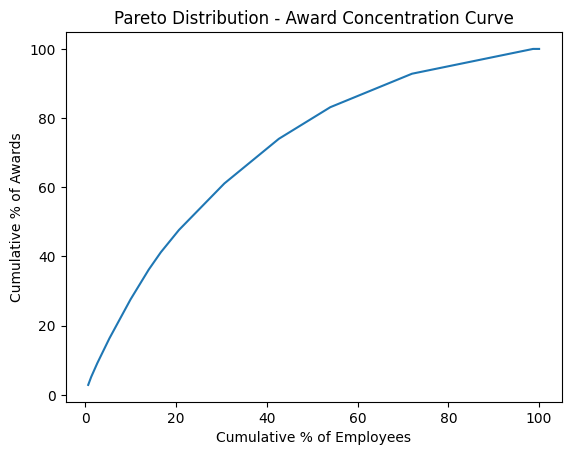

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(employee_awards["Cumulative Employee %"], employee_awards["Cumulative Awards %"])
plt.xlabel("Cumulative % of Employees")
plt.ylabel("Cumulative % of Awards")
plt.title("Pareto Distribution - Award Concentration Curve")
plt.show()


"Larger teams receive disproportionately more awards than smaller teams" - Examining if award distribution correlates with team size rather than actual performance.



Team Award Distribution Analysis:

                        Team name  Team Size  Total Awards  Avg Awrd person
4                            Bose          3             6         2.000000
6                        Edgecore         15            22         1.466667
27                       TA - SST          8            11         1.375000
21                        O9 - DE          9            11         1.222222
13                         Hexure          7             8         1.142857
12                      Greenmath         19            21         1.105263
0                               -         12            13         1.083333
3                        Bootcamp          3             3         1.000000
2   Appreciation for Boston Event         11            11         1.000000
1                          AGCL A          6             6         1.000000
5            Campus participation         24            24         1.000000
9                         GE Team          3        

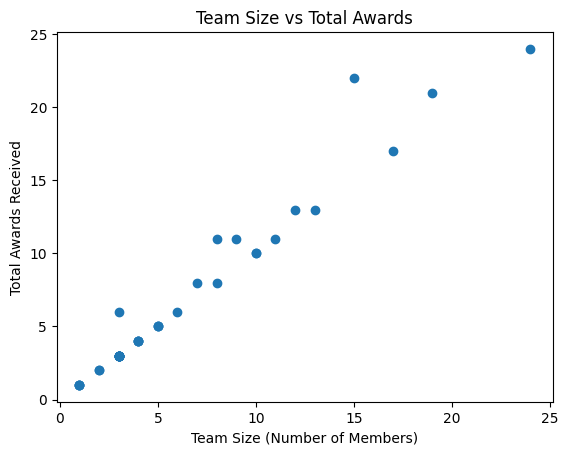

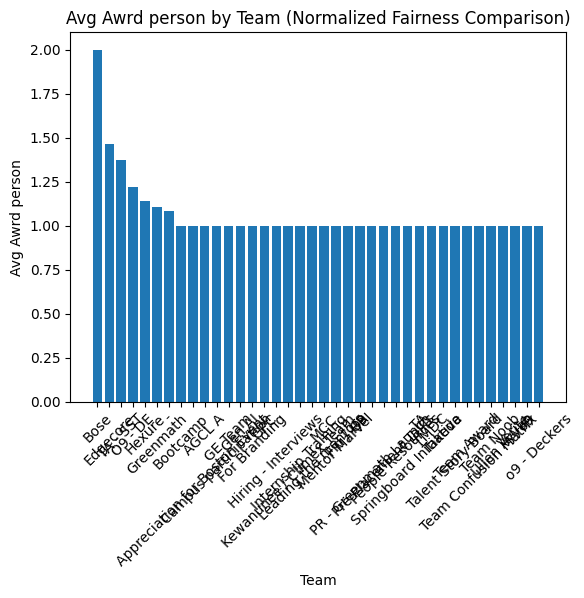

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
sheet_key = "1ocBuWqHA4e9m2-qyEMvfWqed6SUOEHlj_c2GenObysc"
url = f"https://docs.google.com/spreadsheets/d/{sheet_key}/export?format=csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()

# 1. Team Size (Unique Employees per Team)
team_size = df.groupby("Team name")["Employee Name"].nunique().reset_index(name="Team Size")
# 2. Awards per Team (Total Awards)
team_awards = df.groupby("Team name")["Employee Name"].count().reset_index(name="Total Awards")
# 3. Merge and Calculate Avg Awrd person
team_analysis = team_size.merge(team_awards, on="Team name")
team_analysis["Avg Awrd person"] = team_analysis["Total Awards"] / team_analysis["Team Size"]

print("\nTeam Award Distribution Analysis:\n")
print(team_analysis.sort_values("Avg Awrd person", ascending=False))

# -----------------------------
# Visualization 1: Team Size vs Total Awards
# -----------------------------
plt.figure()
plt.scatter(team_analysis["Team Size"], team_analysis["Total Awards"])
plt.xlabel("Team Size (Number of Members)")
plt.ylabel("Total Awards Received")
plt.title("Team Size vs Total Awards")
plt.show()

# -----------------------------
# Visualization 2: Avg Awrd person (Fairness Measure)
# -----------------------------
sorted_ratio = team_analysis.sort_values("Avg Awrd person", ascending=False)

plt.figure()
plt.bar(sorted_ratio["Team name"], sorted_ratio["Avg Awrd person"])
plt.xlabel("Team")
plt.ylabel("Avg Awrd person")
plt.title("Avg Awrd person by Team (Normalized Fairness Comparison)")
plt.xticks(rotation=45)
plt.show()



Awards per Month:
     Month  Awards Count
0     1.0            38
1     2.0            19
2     3.0            23
3     4.0            35
4     5.0            20
5     6.0            14
6     7.0            85
7     8.0           100
8     9.0            80
9    10.0            23
10   11.0            23
11   12.0            24


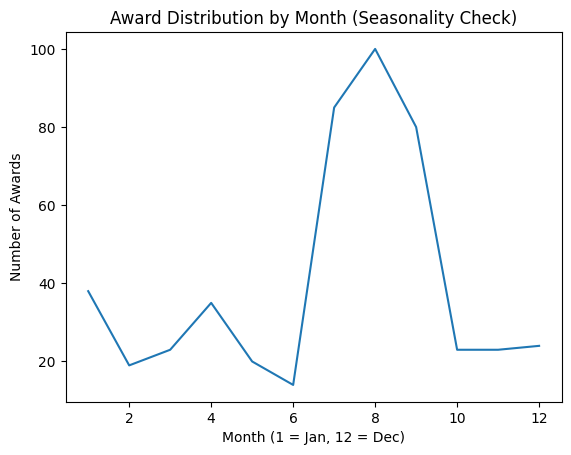


📉 Months with BELOW average award frequency:

    Month  Awards Count
0     1.0            38
1     2.0            19
2     3.0            23
3     4.0            35
4     5.0            20
5     6.0            14
9    10.0            23
10   11.0            23
11   12.0            24

Year-Month Award Summary (useful for deeper seasonal patterns):

    year  Month  Awards Count
0   2023    1.0             9
1   2023    3.0             3
2   2023    5.0             1
3   2023    6.0             2
4   2023    7.0            12
5   2023    8.0             2
6   2023    9.0             5
7   2023   10.0             8
8   2023   11.0            13
9   2023   12.0             5
10  2024    1.0             2
11  2024    2.0             8
12  2024    3.0             4
13  2024    4.0            20
14  2024    5.0            14
15  2024    6.0             4
16  2024    7.0            32
17  2024    8.0            71
18  2024    9.0            14
19  2024   10.0            12
20  2024   11.0  

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data
# Load
sheet_key = "1ocBuWqHA4e9m2-qyEMvfWqed6SUOEHlj_c2GenObysc"
url = f"https://docs.google.com/spreadsheets/d/{sheet_key}/export?format=csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()

# Ensure Month is treated correctly
# If Month is in text form, convert to number (optional)
try:
    df["Month"] = pd.to_datetime(df["Month"], format="%B").dt.month
except:
    pass  # If already numeric, this does nothing

# -----------------------------
# Monthly Award Count
# -----------------------------
monthly_awards = df.groupby("Month")["Employee Name"].count().reset_index(name="Awards Count")
monthly_awards = monthly_awards.sort_values("Month")

print("\nAwards per Month:\n", monthly_awards)

# -----------------------------
# Line Chart: Award Trend by Month
# -----------------------------
plt.figure()
plt.plot(monthly_awards["Month"], monthly_awards["Awards Count"])
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Number of Awards")
plt.title("Award Distribution by Month (Seasonality Check)")
plt.show()

# -----------------------------
# Identify Low Award Months
# -----------------------------
avg = monthly_awards["Awards Count"].mean()
low_months = monthly_awards[monthly_awards["Awards Count"] < avg]

print("\n📉 Months with BELOW average award frequency:\n")
print(low_months)

# -----------------------------
# OPTIONAL: Year-Month Heatmap Data (no plotting)
# -----------------------------
year_month = df.groupby(["year", "Month"])["Employee Name"].count().reset_index(name="Awards Count")
print("\nYear-Month Award Summary (useful for deeper seasonal patterns):\n")
print(year_month)
